In [1]:
import pandas as pd
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
accion_popular = ['coco_ancachi', 'DarwinEspinozaV', 'wilsonsotop']
alianza_progreso = ['LuchoPiconQ', 'robertochiabra', 'SalhuanaE']
avanza_pais = ['1DianaGonzales', 'adrianatudelag', 'AlejandroCavero', 'Gral_Williams', 'RosselliAmuruz']
fuerza_popular = ['A_Aguinaga', 'CesarManuelRev1', 'ErnesBustamante', 'hventuraangel', 'LizarzaburuJuan', 'marthamoyano', 'NanoGuerra4', 'patty_juarez_', 'rosangelak8']
juntos_peru = ['chabelita2020', 'EdgardReymundo', 'RoberthoSanchez', 'ruthlib_', 'sigridbazan']
partido_morado = ['EdMalagaTrillo', 'FlorPabloMedina', 'suselparedes']
peru_libre = ['bermejo_rojas', 'flaviocruzmaman', 'GonzaAmerico', 'GuidoPuka', 'Mariaagueroguti', 'segundoquirozb']
podemos_peu = ['EnriqueWong4', 'JoseLunaGalvez']
renovacion_popular = ['Alm_Montoya', 'AMunante11', 'DiegoBazCal', 'JoseCuetoAservi', 'NormaYarrow4', 'EsdrasMinaya']
somos_peru = ['alfredoazurin15', 'MartinVizcarraC']

partidos = {'accion_popular': accion_popular,
    'alianza_progreso': alianza_progreso,
    'avanza_pais': avanza_pais,
    'fuerza_popular': fuerza_popular,
    'juntos_peru': juntos_peru,
    'partido_morado': partido_morado,
    'peru_libre': peru_libre,
    'podemos_peu': podemos_peu,
    'renovacion_popular': renovacion_popular,
    'somos_peru': somos_peru}

In [3]:
tweets = []
for partido, lista in partidos.items():
    for congresista in lista:
        temp = pd.read_csv('data/' + partido + '/' + congresista + '.csv')
        tweets.append(temp)
tweets = pd.concat(tweets)

In [4]:
# Tokenization
from nltk.tokenize import word_tokenize
# Lemmatization 
from nltk.stem import WordNetLemmatizer
# Load the regular expression library
import re
# Stemmer
from nltk.stem import SnowballStemmer

def removing_accents(word):
    word = re.sub(r'á', 'a', word)
    word = re.sub(r'é', 'e', word)
    word = re.sub(r'í', 'i', word)
    word = re.sub(r'ó', 'o', word)
    word = re.sub(r'ú', 'u', word)
    return word

# 1 Remove punctuation
tweets['tweet_text_processed'] = tweets['tweet'].map(lambda x: re.sub('[,\.!?]', '', x))

# 2 Convert the processed abstracts to lowercase
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: x.lower())

# 3 remove all tokens that are not alphabetic
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha()]))

# 4 removing accents
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: removing_accents(x))

# 4 remove https
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([word for word in word_tokenize(x) if not re.search('^https.*$', word)]))

# 5 stopwords
# get all stopwords 
sr = nltk.corpus.stopwords.words('spanish')
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([word for word in word_tokenize(x) if not word in sr]))

# 6 stemmer
spanish_stemmer = SnowballStemmer('spanish')
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([spanish_stemmer.stem(word) for word in word_tokenize(x)]))

# Print out the first rows of tweets
tweets.head(30)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,political_party,tweet_text_processed
0,1378429823081648135,1378429823081648135,1.617478e+12,2021-04-03 14:30:54,-500,NaN,"#QueNoTeMientan @yonhy_lescano es peruano, abo...",es,"['quenotemientan', 'lescanopresidente']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,quenotemient peruan abog magist lescanopresident
1,1376210584383938565,1376210584383938565,1.616949e+12,2021-03-28 11:32:26,-500,NaN,Con la esperanza de un Perú con igualdad de op...,es,['adelante'],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,esper peru iguald oportun pais just salud cand...
2,1374368172548091913,1374368172548091913,1.616510e+12,2021-03-23 09:31:21,-500,NaN,Las encuestas confirman el apoyo de nuestros p...,es,"['lescanopresidente', 'wilsonsoto', 'huancavel...",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,encuest confirm apoy puebl verdader apuest pol...
3,1374053406344634379,1374053406344634379,1.616435e+12,2021-03-22 12:40:35,-500,NaN,"#DiaMundialDelAgua Con humildad, trabajo y es...",es,"['diamundialdelagua', 'huancavelica', 'wilsons...",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,diamundialdelagu humild trabaj esfuerz luch ju...
4,1372640325492162561,1372640325492162561,1.616098e+12,2021-03-18 15:05:30,-500,NaN,Cómo es posible que en un país donde se produc...,es,['huancavelica'],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,posibl pais produc petrole gas mes enfrent alz...
5,1368586746447990786,1368586746447990786,1.615131e+12,2021-03-07 10:38:02,-500,NaN,El #Congreso no solo debe recordar la importan...,es,"['congreso', 'mujer']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,congres sol deb record import legisl muj marz ...
6,1368262151832502273,1368262151832502273,1.615054e+12,2021-03-06 13:08:12,-500,NaN,Cualquier acción en el estado debe priorizar e...,es,['sinopharm'],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,cualqui accion deb prioriz bienest poblacion p...
7,1366908067082883076,1366908067082883076,1.614731e+12,2021-03-02 19:27:33,-500,NaN,Esperamos que con el anuncio del presidente @F...,es,['huancavelica'],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,esper anunci president fsagasti lleg mas pobla...
8,1366906497435901965,1366906497435901965,1.614731e+12,2021-03-02 19:21:19,-500,NaN,@AccionPopular es el partido político más sóli...,es,"['lescanopresidente', 'wilsonsoto', 'huancavel...",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,accionpopul part polit mas sol peru conviccion...
9,1362023952860672001,1362023952860672001,1.613567e+12,2021-02-17 07:59:50,-500,NaN,Vamos a lograr los sueños de #Huancavelica con...,es,"['huancavelica', 'nuevafotodeperfil']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,accion_popular,vam logr sueñ huancavel trabaj esfuerz nuevafo...


somos_peru
graci 341.61
mas 139.0
si 124.48
much 114.13
hac 112.07
partidomor 110.93
hoy 109.86
vacun 104.92
peru 100.31
pued 97.53
ser 90.22
vot 88.53
trabaj 86.49
vam 85.33
julioguzmanperu 83.65
propuest 83.46
congres 82.7
deb 81.42
pais 81.18
polit 77.23

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


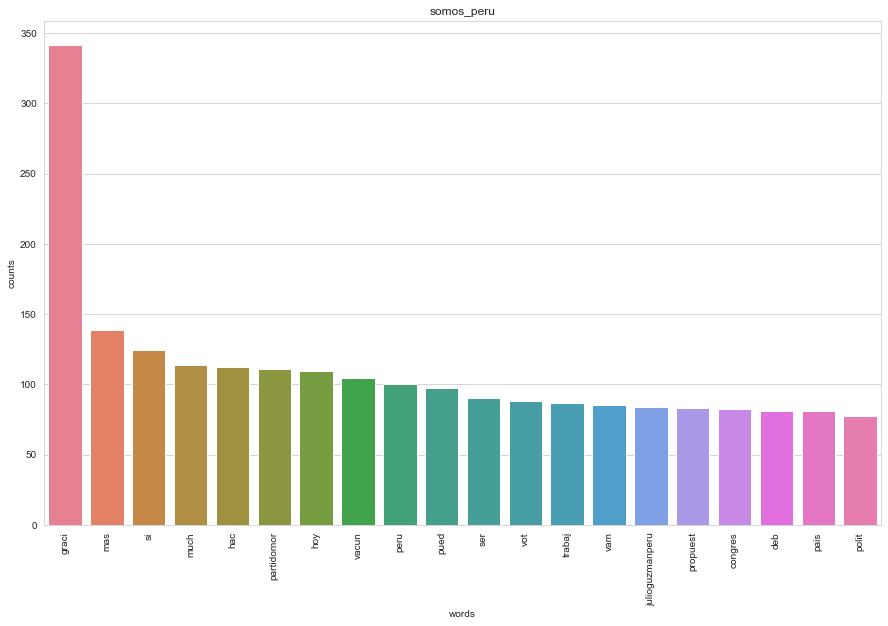

In [5]:
# Load the library with the TFidfVectorizer method
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, _title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    print(_title)
    for i in range(len(words)):
        print(words[i] + " " + str(round(counts[i], 2)))
    print()
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=_title)
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = TfidfVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets['tweet_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer, partido)

In [6]:
import umap
import umap.plot

tfidf_embedding = umap.UMAP(metric='hellinger').fit_transform(count_data)
umap_df = pd.DataFrame(tfidf_embedding, columns=['Component 1', 'Component 2'], index=tweets.index)
data_all = pd.concat([tweets, umap_df], axis=1)

D:\anaconda3\lib\site-packages\umap\umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 18549 edges.
It has only fully disconnected 998 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


In [7]:
data_all.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,political_party,tweet_text_processed,Component 1,Component 2
0,1378429823081648135,1378429823081648135,1.617478e+12,2021-04-03 14:30:54,-500,NaN,"#QueNoTeMientan @yonhy_lescano es peruano, abo...",es,"['quenotemientan', 'lescanopresidente']",[],...,NaN,[],NaN,NaN,NaN,NaN,accion_popular,quenotemient peruan abog magist lescanopresident,7.140257,-1.001788
1,1376210584383938565,1376210584383938565,1.616949e+12,2021-03-28 11:32:26,-500,NaN,Con la esperanza de un Perú con igualdad de op...,es,['adelante'],[],...,NaN,[],NaN,NaN,NaN,NaN,accion_popular,esper peru iguald oportun pais just salud cand...,8.996733,-1.087867
2,1374368172548091913,1374368172548091913,1.616510e+12,2021-03-23 09:31:21,-500,NaN,Las encuestas confirman el apoyo de nuestros p...,es,"['lescanopresidente', 'wilsonsoto', 'huancavel...",[],...,NaN,[],NaN,NaN,NaN,NaN,accion_popular,encuest confirm apoy puebl verdader apuest pol...,7.086683,-0.103392
3,1374053406344634379,1374053406344634379,1.616435e+12,2021-03-22 12:40:35,-500,NaN,"#DiaMundialDelAgua Con humildad, trabajo y es...",es,"['diamundialdelagua', 'huancavelica', 'wilsons...",[],...,NaN,[],NaN,NaN,NaN,NaN,accion_popular,diamundialdelagu humild trabaj esfuerz luch ju...,7.003989,-0.057284
4,1372640325492162561,1372640325492162561,1.616098e+12,2021-03-18 15:05:30,-500,NaN,Cómo es posible que en un país donde se produc...,es,['huancavelica'],[],...,NaN,[],NaN,NaN,NaN,NaN,accion_popular,posibl pais produc petrole gas mes enfrent alz...,8.475424,0.510716


In [8]:
category = "political_party"

colormap = {v: i for i, v in enumerate(data_all[category].unique())}
data_all["color"] = data_all[category].map(colormap)

In [9]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

title = "UMAP"

text = []
for row in tweets.iterrows():
    tooltip = "<br>".join([f"<b>{row[1].index[38]}</b>: {row[1][row[1].index[38]]}",
                           f"<b>{row[1].index[6]}</b>: {row[1][row[1].index[6]]}"])
    text.append(tooltip)

print(len(text))

fig_data = [
    go.Scatter(
        x=data_all["Component 1"],
        y=data_all["Component 2"],
        text=text,
        mode="markers",
        hoverinfo="text",
        marker={"color": data_all["color"], "colorscale" : "RdBu"},
    )
]

layout = {"hovermode": "closest", "title" : title}

figure = go.Figure(data=fig_data, layout=layout)

iplot(figure)

12310


In [10]:
partidos_tweets_ids = {'accion_popular': [],
    'alianza_progreso': [],
    'avanza_pais': [],
    'fuerza_popular': [],
    'juntos_peru': [],
    'partido_morado': [],
    'peru_libre': [],
    'renovacion_popular': [],
    'somos_peru': []}

for i in range(0, len(data_all)):
    partidos_tweets_ids[data_all.iloc[i]['political_party']].append(i)

    

In [11]:
import scipy
from scipy.sparse import csr_matrix

dense_matrix = scipy.sparse.csr_matrix.todense(count_data)

In [12]:
temp_res = []
for key, value in partidos_tweets_ids.items():
    temp_res.append(csr_matrix(dense_matrix[value, :].sum(axis=0)))

In [13]:
count_data_political_party = scipy.sparse.vstack(temp_res, format='csr')

In [14]:
name_political_party_df = pd.DataFrame({'political_party': ['accion_popular','alianza_progreso','avanza_pais','fuerza_popular', 'juntos_peru','partido_morado','peru_libre','renovacion_popular','somos_peru']})

tfidf_embedding = umap.UMAP(metric='cosine').fit_transform(count_data_political_party)
umap_political_party_df = pd.DataFrame(tfidf_embedding,
                                       columns=['Component 1', 'Component 2'],
                                       index=name_political_party_df.index)
data_political_party = pd.concat([name_political_party_df, umap_political_party_df], axis=1)
data_political_party["color"] = data_political_party[category].map(colormap)

D:\anaconda3\lib\site-packages\umap\umap_.py:2213: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [15]:
text = []
for row in data_political_party.iterrows():
    tooltip = "<br>".join([f"<b>{row[1].index[0]}</b>: {row[1][row[1].index[0]]}"])
    text.append(tooltip)



fig_data = [
    go.Scatter(
        x=data_political_party["Component 1"],
        y=data_political_party["Component 2"],
        text=text,
        mode="markers",
        hoverinfo="text",
        marker={"color": data_political_party["color"], "colorscale" : "RdBu"},
    )
]

layout = {"hovermode": "closest", "title" : title}

figure = go.Figure(data=fig_data, layout=layout)

iplot(figure)


In [19]:
congresistas = ['wilsonsotop','robertochiabra', 'SalhuanaE','1DianaGonzales', 'adrianatudelag', 'AlejandroCavero', 'Gral_Williams', 'RosselliAmuruz',

'A_Aguinaga', 'CesarManuelRev1', 'ErnesBustamante', 'hventuraangel', 'LizarzaburuJuan', 'marthamoyano', 'NanoGuerra4', 'patty_juarez_', 'rosangelak8',

'chabelita2020', 'RoberthoSanchez', 'ruthlib_', 'sigridbazan',

'EdMalagaTrillo', 'FlorPabloMedina', 'suselparedes',

'flaviocruzmaman', 'GonzaAmerico', 'Mariaagueroguti',

'Alm_Montoya', 'AMunante11', 'JoseCuetoAservi', 'NormaYarrow4', 'EsdrasMinaya',

'alfredoazurin15', 'MartinVizcarraC']

congressman_political_party = ['accion_popular', 'alianza_progreso', 'alianza_progreso', 'avanza_pais', 'avanza_pais', 'avanza_pais', 'avanza_pais', 'avanza_pais',

'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular',

'juntos_peru', 'juntos_peru', 'juntos_peru', 'juntos_peru', 

'partido_morado', 'partido_morado', 'partido_morado',

'peru_libre', 'peru_libre', 'peru_libre', 

'renovacion_popular', 'renovacion_popular', 'renovacion_popular', 'renovacion_popular', 'renovacion_popular', 

'somos_peru', 'somos_peru']

congresistas_tweets_ids = {}

for i in congresistas:
    congresistas_tweets_ids[i] = []

print(len(congresistas))
print(len(congressman_political_party))

34
34


In [20]:
for i in range(0, len(data_all)):
    congresistas_tweets_ids[data_all.iloc[i]['username']].append(i)

In [29]:
temp_res = []
for key, value in congresistas_tweets_ids.items():
    temp_res.append(csr_matrix(dense_matrix[value, :].sum(axis=0)))
count_data_congressman = scipy.sparse.vstack(temp_res, format='csr')

name_congressman_df = pd.DataFrame({'name': congresistas,
                                    'political_party': congressman_political_party})

tfidf_embedding = umap.UMAP(metric='cosine').fit_transform(count_data_congressman)
umap_congressman_df = pd.DataFrame(tfidf_embedding,
                                   columns=['Component 1', 'Component 2'],
                                   index=name_congressman_df.index)

data_congressman = pd.concat([name_congressman_df, umap_congressman_df], axis=1)

colormap = {v: i for i, v in enumerate(data_congressman[category].unique())}
data_congressman["color"] = data_congressman[category].map(colormap)


In [30]:
data_congressman

,name,political_party,Component 1,Component 2,color
0,wilsonsotop,accion_popular,3.316816,5.962525,0
1,robertochiabra,alianza_progreso,0.436154,6.819205,1
2,SalhuanaE,alianza_progreso,1.861206,5.277549,1
3,1DianaGonzales,avanza_pais,1.003915,5.594217,2
4,adrianatudelag,avanza_pais,2.901890,6.662269,2
5,AlejandroCavero,avanza_pais,1.435621,6.093194,2
6,Gral_Williams,avanza_pais,0.659925,6.055494,2
7,RosselliAmuruz,avanza_pais,0.428416,6.421209,2
8,A_Aguinaga,fuerza_popular,0.761168,7.690846,3
9,CesarManuelRev1,fuerza_popular,1.392834,7.112731,3


In [31]:
text = []
for row in data_congressman.iterrows():
    tooltip = "<br>".join([f"<b>{row[1].index[0]}</b>: {row[1][row[1].index[0]]}"])
    text.append(tooltip)



fig_data = [
    go.Scatter(
        x=data_congressman["Component 1"],
        y=data_congressman["Component 2"],
        text=text,
        mode="markers",
        hoverinfo="text",
        marker={"color": data_congressman["color"], "colorscale" : "RdBu"},
    )
]

layout = {"hovermode": "closest", "title" : title}

figure = go.Figure(data=fig_data, layout=layout)

iplot(figure)